In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [12]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [13]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [14]:
ticker = ["TSLA", "AMZN"]

timeframe = "1month"

start_date = pd.Timestamp("2022-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-03-31", tz="America/New_York").isoformat()


In [15]:
 TSLA= api.get_bars(
    "TSLA",
    timeframe,
    start=start_date,
    end=end_date
).df

TSLA = pd.DataFrame(TSLA["close"])
TSLA.tail()

,close
timestamp,
2022-11-01 04:00:00+00:00,194.70
2022-12-01 05:00:00+00:00,123.18
2023-01-01 05:00:00+00:00,173.22
2023-02-01 05:00:00+00:00,205.71
2023-03-01 05:00:00+00:00,207.41


In [18]:
 AMZN= api.get_bars(
    "AMZN",
    timeframe,
    start=start_date,
    end=end_date
).df

AMZN = pd.DataFrame(AMZN["close"])
AMZN.head()

,close
timestamp,
2022-01-01 05:00:00+00:00,2991.47
2022-02-01 05:00:00+00:00,3071.26
2022-03-01 05:00:00+00:00,3259.95
2022-04-01 04:00:00+00:00,2485.63
2022-05-01 04:00:00+00:00,2404.19


In [19]:
price = pd.concat([AMZN, TSLA], axis=1, join="inner")
price.columns=ticker

price.head()

,TSLA,AMZN
timestamp,,
2022-01-01 05:00:00+00:00,2991.47,936.72
2022-02-01 05:00:00+00:00,3071.26,870.43
2022-03-01 05:00:00+00:00,3259.95,1077.60
2022-04-01 04:00:00+00:00,2485.63,870.76
2022-05-01 04:00:00+00:00,2404.19,758.01


<AxesSubplot:xlabel='timestamp'>

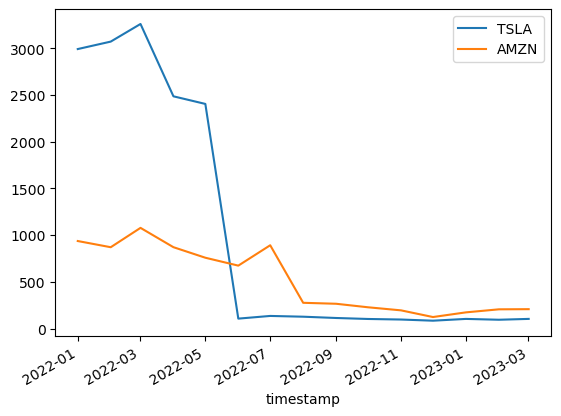

In [20]:
price.plot()

In [25]:
price["TSLA Actual Returns"]=price["TSLA"].pct_change()
price["AMZN Actual Returns"]=price["AMZN"].pct_change()
price.head()

,TSLA,AMZN,TSLA Actual Returns,AMZN Actual Returns
timestamp,,,,
2022-01-01 05:00:00+00:00,2991.47,936.72,NaN,NaN
2022-02-01 05:00:00+00:00,3071.26,870.43,0.026673,-0.070768
2022-03-01 05:00:00+00:00,3259.95,1077.60,0.061437,0.238009
2022-04-01 04:00:00+00:00,2485.63,870.76,-0.237525,-0.191945
2022-05-01 04:00:00+00:00,2404.19,758.01,-0.032764,-0.129485


In [26]:
short_window=2
long_window=4
price["TSLA SMA_Fast"]=price["TSLA"].rolling(window=short_window).mean()
price["AMZN SMA_Fast"]=price["AMZN"].rolling(window=short_window).mean()
price["TSLA SMA_Slow"]=price["TSLA"].rolling(window=long_window).mean()
price["AMZN SMA_Slow"]=price["AMZN"].rolling(window=long_window).mean()
price.head()

,TSLA,AMZN,TSLA Actual Returns,AMZN Actual Returns,TSLA SMA_Fast,AMZN SMA_Fast,TSLA SMA_Slow,AMZN SMA_Slow
timestamp,,,,,,,,
2022-01-01 05:00:00+00:00,2991.47,936.72,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-01 05:00:00+00:00,3071.26,870.43,0.026673,-0.070768,3031.365,903.575,NaN,NaN
2022-03-01 05:00:00+00:00,3259.95,1077.60,0.061437,0.238009,3165.605,974.015,NaN,NaN
2022-04-01 04:00:00+00:00,2485.63,870.76,-0.237525,-0.191945,2872.790,974.180,2952.0775,938.8775
2022-05-01 04:00:00+00:00,2404.19,758.01,-0.032764,-0.129485,2444.910,814.385,2805.2575,894.2000


In [33]:
price.dropna(inplace=True)
TSLA_shares=1
AMZN_shares=1
price["Portfolio Return"]=(price["TSLA Actual Returns"]*TSLA_shares + price["AMZN Actual Returns"]*AMZN_shares).cumprod()
price.tail()

,TSLA,AMZN,TSLA Actual Returns,AMZN Actual Returns,TSLA SMA_Fast,AMZN SMA_Fast,TSLA SMA_Slow,AMZN SMA_Slow,Portfolio Return
timestamp,,,,,,,,,
2022-11-01 04:00:00+00:00,96.54,194.70,-0.057595,-0.144326,99.490,211.120,109.6875,240.7750,-2.310838e-04
2022-12-01 05:00:00+00:00,84.00,123.18,-0.129894,-0.367334,90.270,158.940,98.9950,202.6675,1.149015e-04
2023-01-01 05:00:00+00:00,103.13,173.22,0.227738,0.406235,93.565,148.200,96.5275,179.6600,7.284442e-05
2023-02-01 05:00:00+00:00,94.23,205.71,-0.086299,0.187565,98.680,189.465,94.4750,174.2025,7.376670e-06
2023-03-01 05:00:00+00:00,103.28,207.41,0.096042,0.008264,98.755,206.560,96.1600,177.3800,7.694285e-07


In [34]:
Damien_df = price.drop(columns=["AMZN", "TSLA", "AMZN Actual Returns", "TSLA Actual Returns"]).copy()
Damien_df.head()

,TSLA SMA_Fast,AMZN SMA_Fast,TSLA SMA_Slow,AMZN SMA_Slow,Portfolio Return
timestamp,,,,,
2022-04-01 04:00:00+00:00,2872.79,974.180,2952.0775,938.8775,-0.429470
2022-05-01 04:00:00+00:00,2444.91,814.385,2805.2575,894.2000,0.069681
2022-06-01 04:00:00+00:00,1255.20,715.715,2063.9950,844.9475,-0.074379
2022-07-01 04:00:00+00:00,120.58,782.435,1282.7450,798.4100,-0.044208
2022-08-01 04:00:00+00:00,130.86,583.530,693.0300,649.6225,0.033220
